In [1]:
# Hi everyone.
# We're going to explore the NYPD data set to figure out who in NYC is the naughtiest group :o
# First, let's import some stuff!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns


In [2]:
df = pd.read_csv('NYPD_Data/NYPD_Complaint_Data_Historic_20240221.csv')

C:\Users\TimEW\AppData\Local\Temp\ipykernel_14536\3630547272.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYPD_Data/NYPD_Complaint_Data_Historic_20240221.csv')


In [3]:
df.head(50)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,16784525,06/17/2006,00:30:00,NaN,(null),6.0,06/18/2006,578,HARRASSMENT 2,638.0,...,F,NaN,40.734091,-74.006238,"(40.734091, -74.006238)",PATROL BORO MAN SOUTH,(null),45-64,WHITE,F
1,10973318,04/06/2006,09:30:00,NaN,(null),6.0,04/12/2006,578,HARRASSMENT 2,638.0,...,F,NaN,40.741288,-74.006167,"(40.741288, -74.006167)",PATROL BORO MAN SOUTH,(null),45-64,WHITE,F
2,23859785,08/12/2006,11:29:00,NaN,(null),20.0,08/12/2006,105,ROBBERY,361.0,...,M,NaN,40.775083,-73.982182,"(40.775083, -73.982182)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,D
3,16544671,05/22/2006,16:30:00,NaN,(null),47.0,05/22/2006,105,ROBBERY,380.0,...,M,NaN,40.903862,-73.846994,"(40.903862, -73.846994)",PATROL BORO BRONX,(null),25-44,WHITE,M
4,16856905,06/01/2005,00:01:00,06/18/2006,11:00:00,NaN,06/21/2006,104,RAPE,153.0,...,M,NaN,NaN,NaN,NaN,(null),(null),<18,BLACK,F
5,16705935,04/06/2006,09:00:00,05/04/2006,23:59:00,NaN,06/06/2006,341,PETIT LARCENY,303.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),65+,WHITE,F
6,33015364,06/08/2007,03:46:00,NaN,(null),68.0,07/09/2007,114,ARSON,263.0,...,(null),NaN,40.635178,-74.024779,"(40.635178, -74.024779)",PATROL BORO BKLYN SOUTH,(null),(null),UNKNOWN,E
7,27287587,03/07/2007,16:10:00,NaN,(null),14.0,03/07/2007,105,ROBBERY,361.0,...,M,NaN,40.755640,-73.990952,"(40.75564, -73.990952)",PATROL BORO MAN SOUTH,(null),(null),UNKNOWN,D
8,34082558,08/30/2007,02:25:00,NaN,(null),18.0,08/30/2007,109,GRAND LARCENY,415.0,...,M,NaN,40.760405,-73.987474,"(40.76040496, -73.98747426)",PATROL BORO MAN SOUTH,(null),25-44,BLACK,F
9,26081232,01/03/2007,16:35:00,NaN,(null),19.0,01/03/2007,105,ROBBERY,361.0,...,M,NaN,40.763744,-73.964984,"(40.763744, -73.964984)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,D


In [4]:
df.OFNS_DESC.unique()

array(['HARRASSMENT 2', 'ROBBERY', 'RAPE', 'PETIT LARCENY', 'ARSON',
       'GRAND LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'MISCELLANEOUS PENAL LAW', 'FELONY ASSAULT', '(null)', 'FRAUDS',
       'FORGERY', 'DANGEROUS DRUGS', 'BURGLARY', 'DANGEROUS WEAPONS',
       'POSSESSION OF STOLEN PROPERTY', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFF. AGNST PUB ORD SENSBLTY &',
       'OFFENSES AGAINST THE PERSON', 'VEHICLE AND TRAFFIC LAWS',
       'INTOXICATED & IMPAIRED DRIVING', 'GRAND LARCENY OF MOTOR VEHICLE',
       'OFFENSES AGAINST PUBLIC ADMINI', 'NYS LAWS-UNCLASSIFIED FELONY',
       'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
       'CRIMINAL TRESPASS', 'ADMINISTRATIVE CODE',
       'OFFENSES INVOLVING FRAUD', 'KIDNAPPING & RELATED OFFENSES',
       'SEX CRIMES', 'OFFENSES AGAINST PUBLIC SAFETY', 'OTHER STATE LAWS',
       'ALCOHOLIC BEVERAGE CONTROL LAW', "BURGLAR'S TOOLS",
       'PETIT LARCENY OF MOTOR VEHICLE',
       'PROSTITUTION

In [5]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

C:\Users\TimEW\AppData\Local\Temp\ipykernel_14536\1907456573.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")


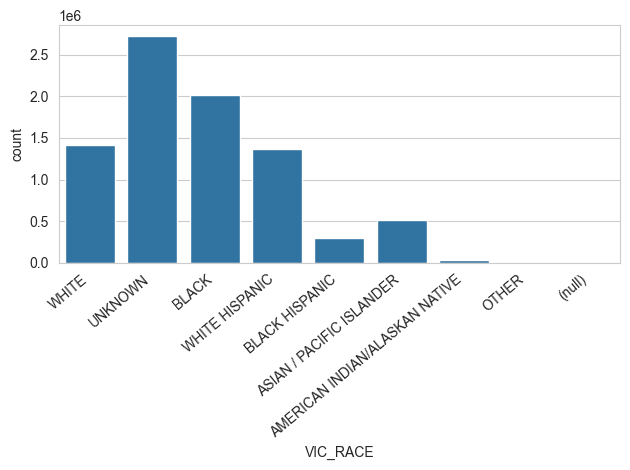

In [6]:
ax2 = sns.countplot(x='VIC_RACE', data=df, legend='brief')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_14536\3544368141.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


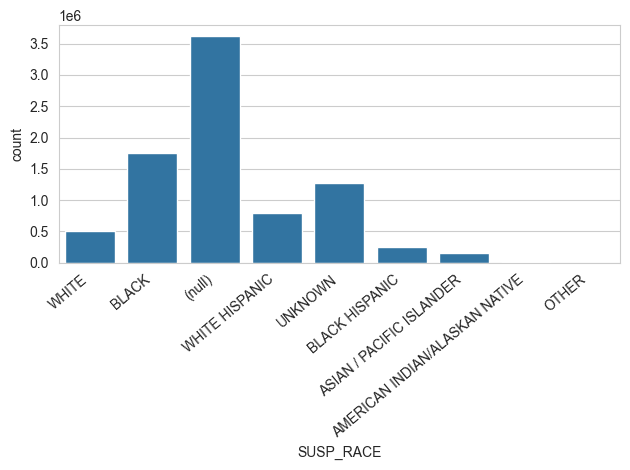

In [7]:
ax = sns.countplot(x='SUSP_RACE', data=df, legend='brief')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [8]:
df.describe()

,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,8.359020e+06,8.359721e+06,8.352514e+06,8.359721e+06,8.359267e+06,8.359267e+06,183312.000000,8.359267e+06,8.359267e+06
mean,6.332978e+01,2.970528e+02,4.120531e+02,6.936230e-01,1.004909e+06,2.071661e+05,13.672045,4.073521e+01,-7.392534e+01
std,3.456075e+01,1.517021e+02,2.174988e+02,6.564904e+00,2.149792e+04,3.038138e+04,12.498551,9.349108e-02,1.089978e-01
min,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-7.425495e+01
25%,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.917000e+05,1.844870e+05,3.000000,4.067299e+01,-7.397310e+01
50%,6.300000e+01,3.410000e+02,3.610000e+02,0.000000e+00,1.004377e+06,2.061740e+05,11.000000,4.073255e+01,-7.392732e+01
75%,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016802e+06,2.351530e+05,30.000000,4.081211e+01,-7.388242e+01
max,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067306e+06,2.719090e+05,34.000000,4.091296e+01,0.000000e+00


In [9]:
df.OFNS_DESC.value_counts()

OFNS_DESC
PETIT LARCENY                      1446865
HARRASSMENT 2                      1103392
ASSAULT 3 & RELATED OFFENSES        877008
CRIMINAL MISCHIEF & RELATED OF      834329
GRAND LARCENY                       733005
                                    ...   
FORTUNE TELLING                         12
ABORTION                                 7
OFFENSES AGAINST MARRIAGE UNCL           5
UNDER THE INFLUENCE OF DRUGS             3
KIDNAPPING AND RELATED OFFENSES          3
Name: count, Length: 73, dtype: int64

C:\Users\TimEW\AppData\Local\Temp\ipykernel_14536\551247422.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")


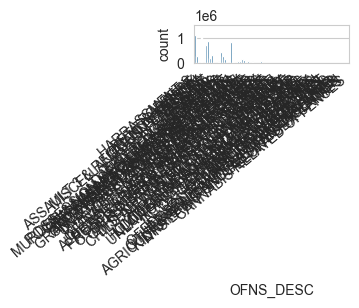

In [37]:
ax3 = sns.countplot(x='OFNS_DESC', data=df, legend='brief')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
plt.rcParams["figure.figsize"] = (3,1)
plt.show()